In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons, make_classification
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

# 2. Fonctions

In [15]:
def initialisation(dimensions):
    
    params = {}
    C = len(dimensions)
    
    np.random.seed(1)
    
    for c in range(1, C):
        params['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        params['b' + str(c)] = np.random.randn(dimensions[c], 1)
    
    return params

In [16]:
def forward_propagation(X, params):
    
    activations = {'A0': X}
    
    C = len(params) // 2
    
    for c in range(1, C + 1):
        Z = params['W' + str(c)].dot(activations['A' + str(c-1)]) + params['b' + str(c)]
        activations['A' + str(c)] = 1 / (1 + np.exp(-Z))
    
    return activations

In [17]:
def back_propagation(y, activations, params):
    
    m = y.shape[1]
    
    C = len(params) // 2
    
    dZ = activations['A' + str(C)] - y
    gradients = {}
    
    for c in reversed(range(1, C + 1)):
        gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
        gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        if c > 1:
            dZ = np.dot(params['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])
        
    return gradients

In [18]:
def update(gradients, params, learning_rate):
    
    C = len(params) // 2
    
    for c in range(1, C + 1):
        params['W' + str(c)] = params['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        params['b' + str(c)] = params['b' + str(c)] - learning_rate * gradients['db' + str(c)]
    
    return params

In [19]:
def predict(X, params):
    # Propagation avant pour obtenir les activations
    activations = forward_propagation(X, params)
    
    C = len(params) // 2
    
    # Récupération de la dernière activation
    final_activation = activations['A' + str(C)]
    
    # Retourne la prédiction binaire
    return final_activation >= 0.5

In [20]:
def deep_neural_network(X, y, hidden_layer, learning_rate=0.01, n_iter=1000):
    # Initialisation et entraînement
    dimensions = list(hidden_layer)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(0)
    params = initialisation(dimensions)

    training_history = np.zeros((int(n_iter), 2))
    
    C = len(params) // 2

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, params)
        gradient = back_propagation(y, activations, params)
        params = update(gradient, params, learning_rate)
        Af = activations['A' + str(C)]

        training_history[i, 0] = (log_loss(y.flatten(), Af.flatten()))
        y_pred = predict(X, params)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))

    # Récupérer l'accuracy finale
    final_accuracy = training_history[-1, 1]

    # Tracer les courbes de perte et d'accuracy
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.plot(training_history[:, 0], label="train loss")
    plt.title("Fonction de cout")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(training_history[:, 1], label="train acc")
    plt.title(f"Performance : {final_accuracy:.2f}")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.legend()

    # Tracer la frontière de décision
    plt.subplot(1, 3, 3)
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = predict(np.c_[xx.ravel(), yy.ravel()].T, params)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='summer')
    plt.scatter(X[0, :], X[1, :], c=y.flatten(), edgecolors='k', marker='o')
    plt.title(f"Frontiere de decision")
    plt.xlabel("x1")
    plt.ylabel("x2")
    # plt.legend()

    plt.show()

    return training_history

# Dataset

dimensions de X: (2, 1000)
dimensions de y: (1, 1000)


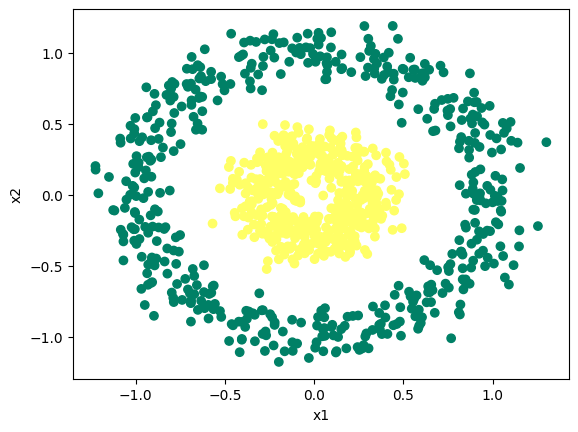

In [21]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


# X, y = make_moons(n_samples=100, noise=0.25, random_state=0)

# X = X.T  
# # y = y.reshape(1, -1)  
# y = y.reshape((1, y.shape[0]))

# print("X shape:", X.shape)  
# print("y shape:", y.shape)  

# plt.scatter(X[0, :], X[1, :], c=y, cmap='summer', edgecolors='k')
# plt.title("Données d'entraînement")
# plt.xlabel("x1")
# plt.ylabel("x2")
# plt.show()

100%|██████████| 1000/1000 [00:01<00:00, 676.80it/s]


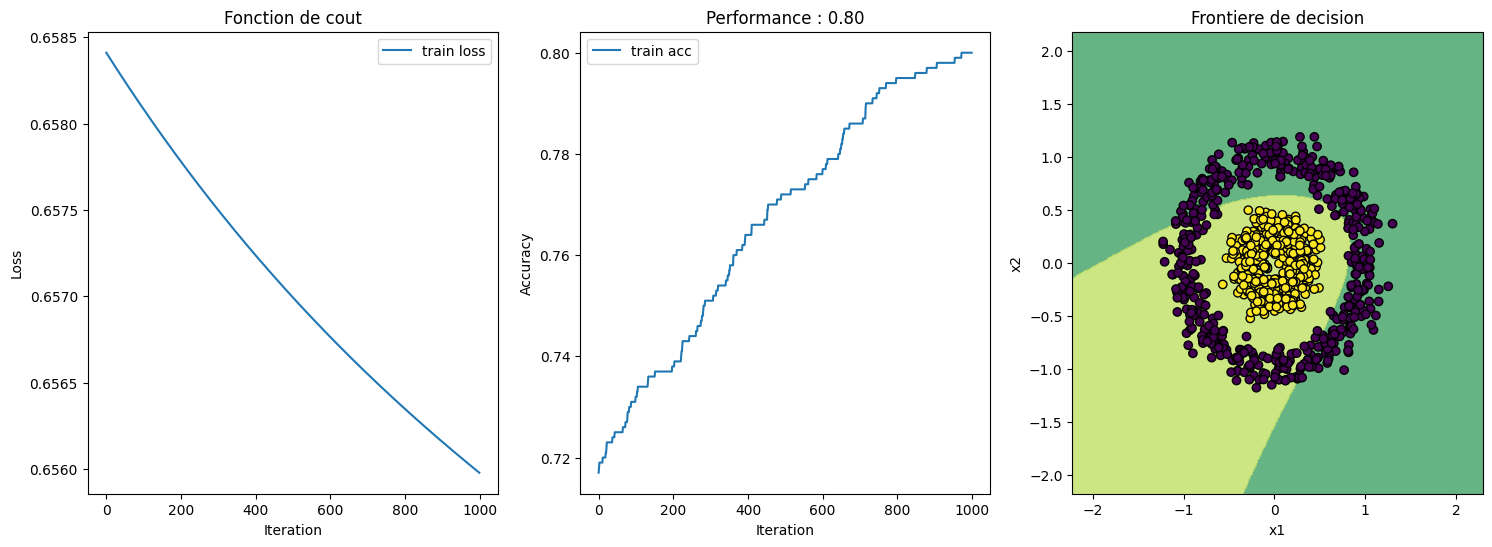

array([[0.65841059, 0.717     ],
       [0.65840719, 0.718     ],
       [0.65840379, 0.719     ],
       ...,
       [0.65598254, 0.8       ],
       [0.65598078, 0.8       ],
       [0.65597902, 0.8       ]])

In [33]:
deep_neural_network(X, y, [4], learning_rate=0.001, n_iter=1000)